# Data generation



1.   Understanding and visualizing the MNIST dataset



In [2]:
#Import libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

mnist = tf.keras.datasets.mnist

In [3]:
#Fixed seed to produce reproducible results
seed_value = 42

In [4]:
#Loading MNIST dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()


In [5]:
#Looking at the properties of the data
print(x_train[0][6])
print("Max value of training set is:",x_train.max())
print("Max value of testing set is:",x_test.max())
print("Min value of training set is:",x_train.min())
print("Min value of testing set is:",x_test.min())

[  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
 225 172 253 242 195  64   0   0   0   0]
Max value of training set is: 255
Max value of testing set is: 255
Min value of training set is: 0
Min value of testing set is: 0


In [6]:
#Scaling the data
x_train, x_test = x_train / 255.0, x_test / 255.0

In [7]:
#Looking at the data after normalization
print(x_train[0][6])
print("Max value of the scaled training set is:",x_train.max())
print("Max value of the scaled testing set is:",x_test.max())
print("Min value of the scaled training set is:",x_train.min())
print("Min value of the scaled testing set is:",x_test.min())

[0.         0.         0.         0.         0.         0.
 0.         0.         0.11764706 0.14117647 0.36862745 0.60392157
 0.66666667 0.99215686 0.99215686 0.99215686 0.99215686 0.99215686
 0.88235294 0.6745098  0.99215686 0.94901961 0.76470588 0.25098039
 0.         0.         0.         0.        ]
Max value of the scaled training set is: 1.0
Max value of the scaled testing set is: 1.0
Min value of the scaled training set is: 0.0
Min value of the scaled testing set is: 0.0


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


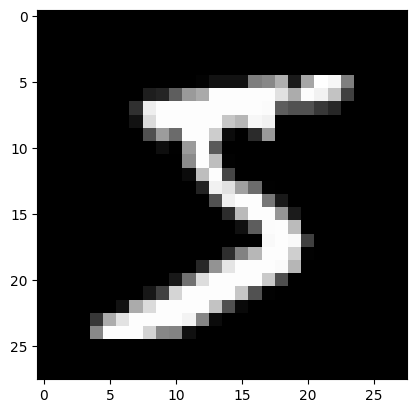

Label for the image above: 5


In [8]:
#Checking the dimensions to better understand the dataset
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

#Cheching the data
plt.imshow(x_train[0],cmap='gray')
plt.show()
print("Label for the image above:",y_train[0])

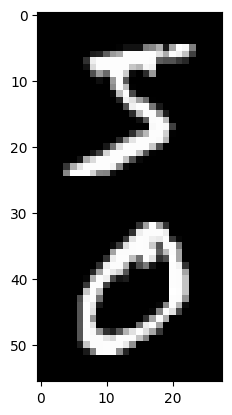

Label for the image above: 5


In [9]:
#Visualizing what a combination of images looks like:
plt.imshow(np.concatenate((x_train[0],x_train[1]),axis=0),cmap='gray')
plt.show()
print("Label for the image above:", y_train[1]+y_train[0])

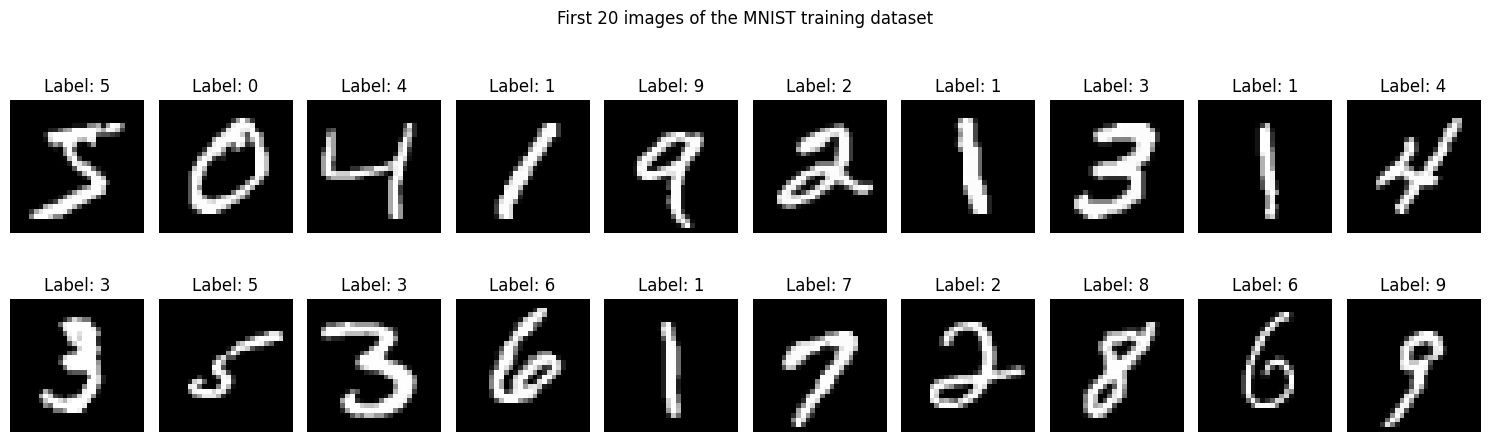

In [10]:
#Visualizing first 20 images of the training data
fig, axes = plt.subplots(2, 10, figsize=(15, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i], cmap='gray')
    ax.axis('off')
    ax.set_title(f"Label: {y_train[i]}")

plt.suptitle("First 20 images of the MNIST training dataset")
plt.tight_layout()
plt.show()

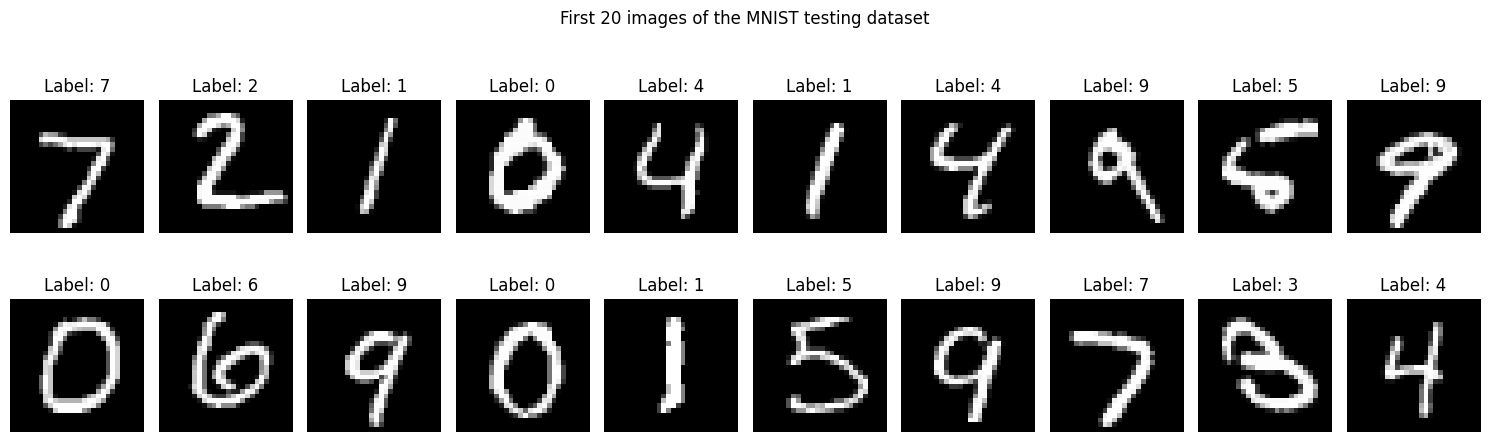

In [11]:
#Visualizing first 20 images of the testing data
fig, axes = plt.subplots(2, 10, figsize=(15, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_test[i], cmap='gray')
    ax.axis('off')
    ax.set_title(f"Label: {y_test[i]}")

plt.suptitle("First 20 images of the MNIST testing dataset")
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Frequency')

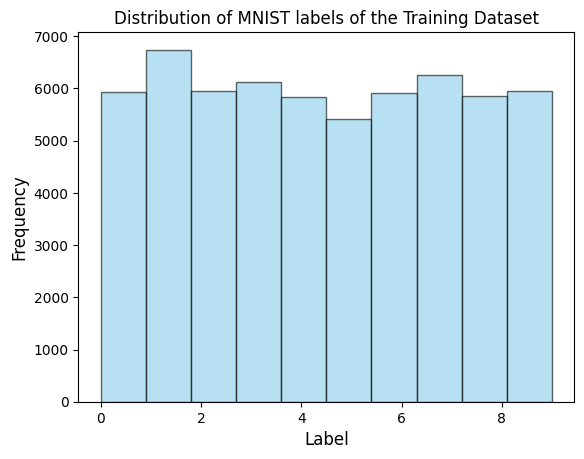

In [12]:
#Distribution of the traning labels of the original MNIST dataset
plt.hist(y_train, bins=10, edgecolor="black", color="skyblue", alpha=0.6)
plt.title("Distribution of MNIST labels of the Training Dataset")
plt.xlabel("Label", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

Text(0, 0.5, 'Frequency')

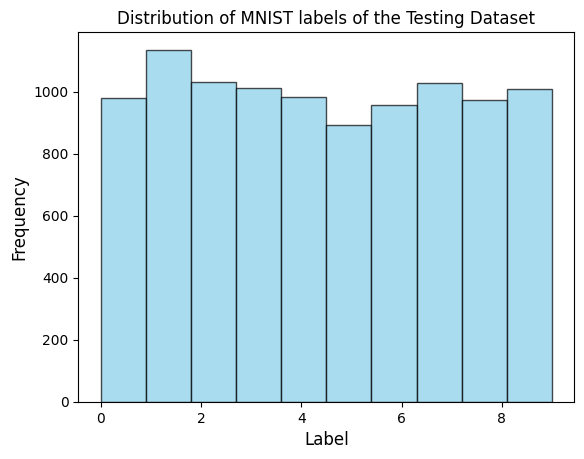

In [13]:
#Distribution of the testing labels of the original MNIST dataset
plt.hist(y_test, bins=10, edgecolor="black", color="skyblue", alpha=0.7)
plt.title("Distribution of MNIST labels of the Testing Dataset")
plt.xlabel("Label", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

We can see that the dataset is uniform across the 10 classes.

2.  Generating the combined training dataset:



In [14]:
#Setting the seed to get reproducible training data generation
np.random.seed(seed_value)

#Combining training images and labels:
combined_x_train=[]
combined_y_train=[]

#Loop 'len(x_train)' times to get a new combined training dataset of the same length as the original MNIST training dataset
for i in range(len(x_train)):
  #Randomly select two images and their labels from training data
  choice1, choice2= np.random.randint(0, len(x_train), 2)
  image1=x_train[choice1]
  label1=y_train[choice1]
  image2=x_train[choice2]
  label2=y_train[choice2]

  #Combine labels and images and append them to their corresponding lists
  combined_x_train.append(np.concatenate((image1,image2),axis=0))
  combined_y_train.append(label1+label2)

Text(0, 0.5, 'Frequency')

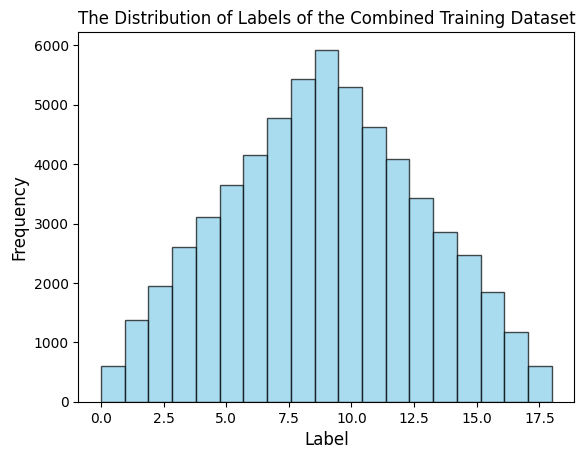

In [15]:
#Distribution of the traning labels of the combined dataset
plt.hist(combined_y_train, bins=19, edgecolor="black", color="skyblue", alpha=0.7)
plt.title("The Distribution of Labels of the Combined Training Dataset")
plt.xlabel("Label", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

In [16]:
#Converting lists to arrays
combined_x_train=np.array(combined_x_train)
combined_y_train=np.array(combined_y_train)
print("Size of the new training image dataset:", combined_x_train.shape)
print("Size of the new training label dataset:", combined_y_train.shape)

Size of the new training image dataset: (60000, 56, 28)
Size of the new training label dataset: (60000,)


3.  Generating the combined validation dataset:



In [17]:
#Setting the seed to get reproducible training and validation data split
random.seed(seed_value)

# Splitting the combined training data into training and validation sets (80% training, 20% validation)
combined_x_train, combined_x_val, combined_y_train, combined_y_val = train_test_split(combined_x_train,combined_y_train, test_size=0.2, random_state=42)

In [18]:
#Checking that the dimensions of our newly generated training and validation data are correct
print("Size of the new combined training dataset:", combined_x_train.shape)
print("Size of the new combined validation dataset:", combined_x_val.shape)

Size of the new combined training dataset: (48000, 56, 28)
Size of the new combined validation dataset: (12000, 56, 28)


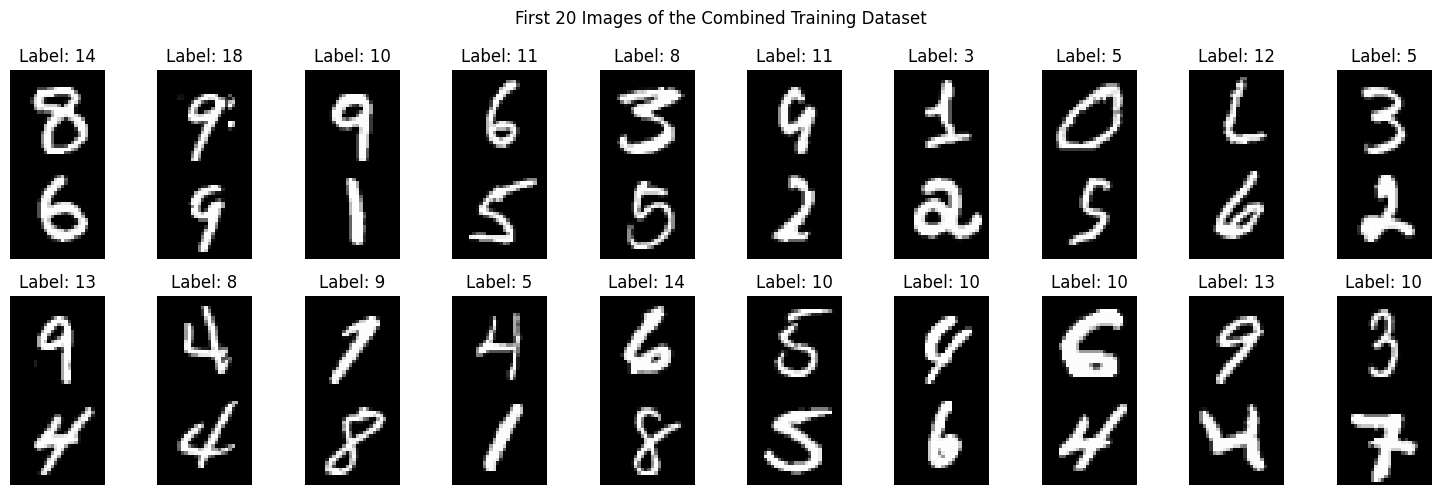

In [19]:
#Visualizing first 20 images of the new generated training data
fig, axes = plt.subplots(2, 10, figsize=(15, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(combined_x_train[i], cmap='gray')
    ax.axis('off')
    ax.set_title(f"Label: {combined_y_train[i]}")

plt.suptitle("First 20 Images of the Combined Training Dataset")
plt.tight_layout()
plt.show()



4.    Generating the combined testing dataset:




In [20]:
#Setting the seed to get reproducible testing data generation
np.random.seed(seed_value)


#Combining testing images and labels:
#Sequential_lists are used to store individual testing images and labels of the combined data for further deconstruction (Question 4).
combined_x_test=[]
combined_y_test=[]

#Loop 'len(x_test)' times to get a new combined testing dataset of the same length as the original MNIST testing dataset
for i in range(len(x_test)):
  #Randomly select two images and their labels from testing data
  choice1, choice2= np.random.randint(0, len(x_test), 2)
  image1=x_test[choice1]
  label1=y_test[choice1]
  image2=x_test[choice2]
  label2=y_test[choice2]

  #Combine labels and images and append them to their corresponding lists
  combined_x_test.append(np.concatenate((image1,image2),axis=0))
  combined_y_test.append(label1+label2)


Text(0, 0.5, 'Frequency')

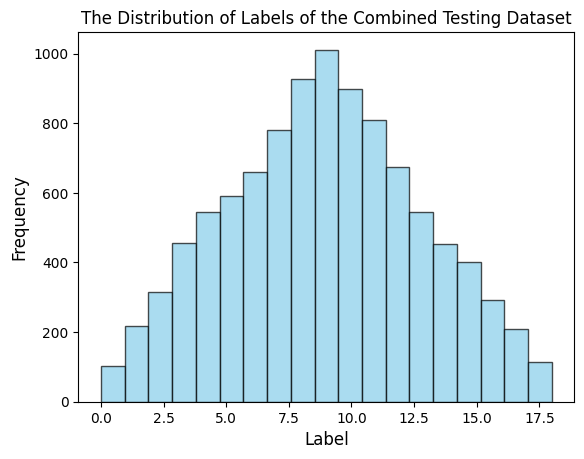

In [21]:
#Distribution of the testing labels of the combined dataset
plt.hist(combined_y_test, bins=19, edgecolor="black", color="skyblue", alpha=0.7)
plt.title("The Distribution of Labels of the Combined Testing Dataset")
plt.xlabel("Label", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

In [22]:
#Converting lists to arrays
combined_x_test=np.array(combined_x_test)
combined_y_test=np.array(combined_y_test)

In [23]:
#Checking that the dimensions of our newly generated testing data are correct
print("Size of the new testing image dataset:", combined_x_test.shape)
print("Size of the new testing label dataset:", combined_y_test.shape)

Size of the new testing image dataset: (10000, 56, 28)
Size of the new testing label dataset: (10000,)


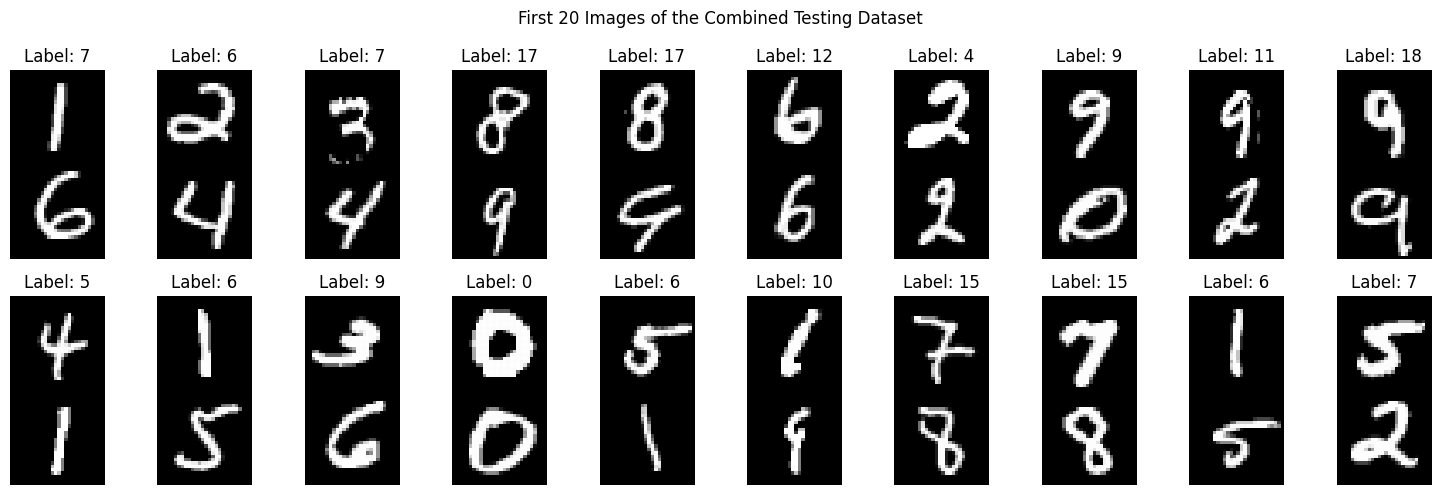

In [24]:
#Visualizing first 20 images of the new generated testing data
fig, axes = plt.subplots(2, 10, figsize=(15, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(combined_x_test[i], cmap='gray')
    ax.axis('off')
    ax.set_title(f"Label: {combined_y_test[i]}")

plt.suptitle("First 20 Images of the Combined Testing Dataset")
plt.tight_layout()
plt.show()